In [453]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Here is a link to my source code
https://github.com/CeceZiegler1/CeceZiegler1.github.io/blob/main/posts/LinearRegressionBlog/LinearRegression.py

# Introduction
This post illustrates my implementation of linear regression using both the analytical formula we derived along with a gradient decent method similar to what I used in my logistic regression post. What I will show is that no matter which method of linear regression we use, we will arrive at the same result in terms of the score showing how well the model performs. After showing that both the analytical formula and gradient decent method arrive at the same result, I will look into how changing the number of features affects the training and validation score, and how it differs with the analytic method vs gradient decent. 

In [454]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

# Analytic Formula Implementation and Results:
Below, I use the function provided in the assignment outline to create data to test my analytic fit implementation. For this implementation, I used my fit_analytic method which calculates the weight vector by using the formula that takes the inverse of the transpose of X with the dot prodct of X combined with the transpose of X dotted with y. After fitting my model on the test data, I print out the scores from the model when run on the train data and when run on the testing data. The results show that my model produces very similar scores on my training data and test data. the scores depend on how the data is randomized and where the points are, however, in the results below, the data that was randomly produced was well fitted to my analytic linear regression model, as I got a score of 0.7439 on the train data and 0.7361 on the test data. 

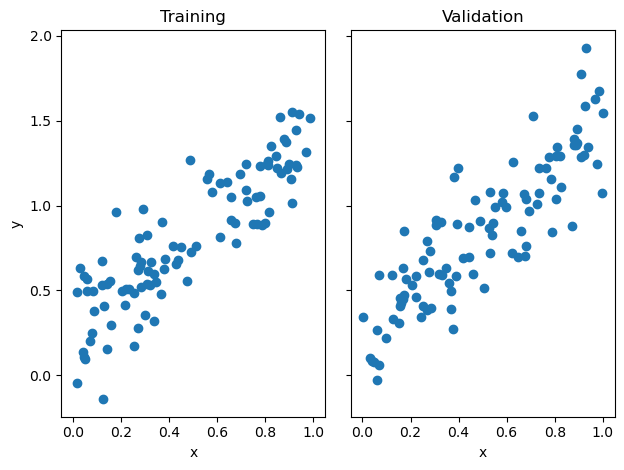

In [457]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

In [458]:
from LinearRegression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.7662
Validation score = 0.7483


# Gradient Descent Implementation and Results
Below, I fit my data to my implementation of linear regression using gradient descent. For the gradient descent implementation, I computed the gradient using the formula L(w) = Pw - q where P is the transpose of X dotted with X and q is the transpose of X dotted with y. This is a more efficient way to compute the gradient as P and q will always stay the same, with w being the only thing that changes each iteration. What we are looking for in our gradient descent implementation is to get the same training and validation scores as the above implementation with the analytic formula. The results show that our gradient descent was calculated properly as the get the same scores as above when computed the scores on the train data and validation data.

In [459]:
from LinearRegression import LinearRegression

LR2 = LinearRegression()
LR2.fit_gradient(X_train, y_train, 0.01, 100) # I used the analytical formula as my default fit method

print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")

Training score = 0.7662
Validation score = 0.7483


## Gradient Descent Score over Time
Below is a graph of how the score increases overtime with the gradient decent implementation. As we can see from the graph, the score starts off low, but increases with each iteration as the weight vector moves down the gradient. My program runs for 100 iterations, but we can see the best score is reached around 20-25 iteration mark and reamains for the rest of the iterations. 

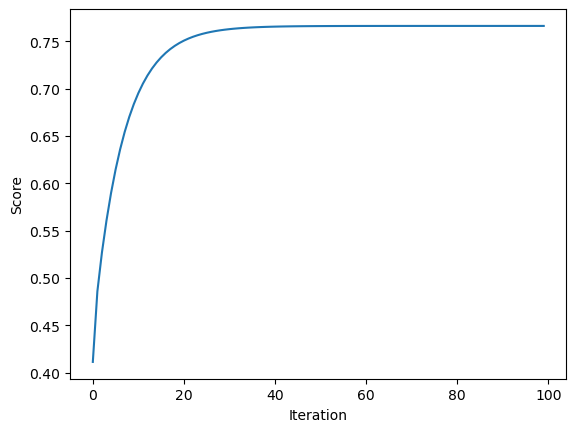

In [460]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

# Increasing P Features: How # of Features Changes Training and Validation Scores
Below is a plot of how the training and validation scores change as the number of features are increased but the number of training points remains the same. The graph plots the number of features on the x axis and the score on the y axis. From the graph, it is shown that when the number of features increases, the training score increases and eventually evens out at a perfect score of 1. However, the validation score starts off well and increases as the number of features increases until it gets near being equal to the total number of training points. Once it gets near being equal to the number of training points, the score takes a sharp drop off and eventually reaches zero. This can be attributed to overfitting our data when the number of features is equal to the training points, meaning it excells on the training data but is overfit and does poorly on validation data.

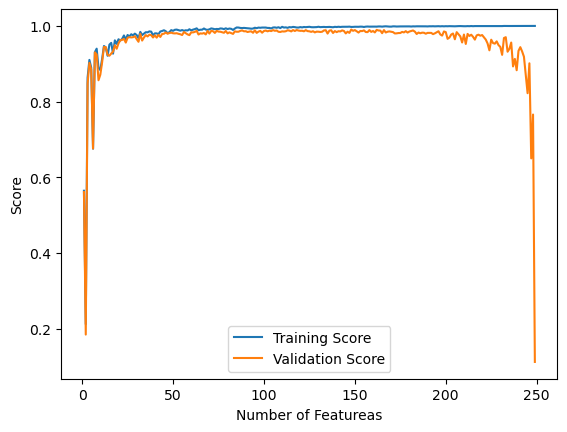

In [461]:
n_train = 250
n_val = 250
p_features = range(1, n_train)
noise = 0.2

train_score = []
val_score = []

# create some data
for i in p_features:
    X_train3, y_train3, X_val3, y_val3 = LR_data(n_train, n_val, i, noise)
    LR5 = LinearRegression()
    LR5.fit_analytic(X_train3, y_train3)
    train_score.append(LR5.score(X_train3, y_train3).round(4))
    val_score.append(LR5.score(X_val3, y_val3).round(4))

plt.plot(p_features, train_score, label = "Training Score")
plt.plot(p_features, val_score, label = "Validation Score")
plt.xlabel('Number of Featureas')
plt.ylabel('Score')
plt.legend()
plt.show()

# Increases Features with Gradient Descent
Below we look to see what happens with the training score and validation score as the number of features are increased. The graph plots the score on the y axis and the numbr of features on the x axis. I expected to see the same results as above with the analytic model, however what we see from the grpah is different. Instead of evening out to one, the training score continues to fluctuate for all values of p and never reaches a score of 1. The validation score is also different, as it also continues to fluctuate very similarly to the training score and ends up at about the same score instead of taking a sharp drop to zero like the validation score did in the analytic fit implementation above. This can be attributed to how the learning rate affects the gradient and the computation of the weight vector, w. I played around with different learning rate values, but the graph below appeared to be the best I could get for the scores with this iteration of data.

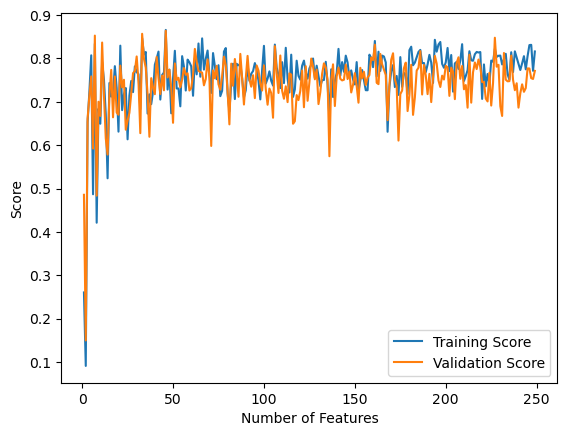

In [463]:
n_train = 250
n_val = 250
p_features = range(1, n_train)
noise = 0.2

train_score = []
val_score = []
LR6 = LinearRegression()

# create some data
for i in p_features:
    X_train3, y_train3, X_val3, y_val3 = LR_data(n_train, n_val, i, noise)
    LR6.fit_gradient(X_train3, y_train3, 0.000009, 500)
    train_score.append(LR6.score(X_train3, y_train3).round(4))
    val_score.append(LR6.score(X_val3, y_val3).round(4))

plt.plot(p_features, train_score, label = "Training Score")
plt.plot(p_features, val_score, label = "Validation Score")
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.show()

# LASSO Regularization:
Below is my implementation of LASSO Regularization. LASSO regularization makes the weight vector, w, smaller, and is beneficial when the number of features, p, is high. Below, I implemented the same graph I did above with number of features on the x axis and score on the y axis. This graph is similar to the analytic fit implementation. Here, it is shown that for the first part of the graph, as p increases, the validation score also increases. However, as the number of features nears the number of training points, the score begins to drop off, but not as sharply as in the alaytic fit implementation.

In [464]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

L.score(X_val, y_val)

0.7676087758931377

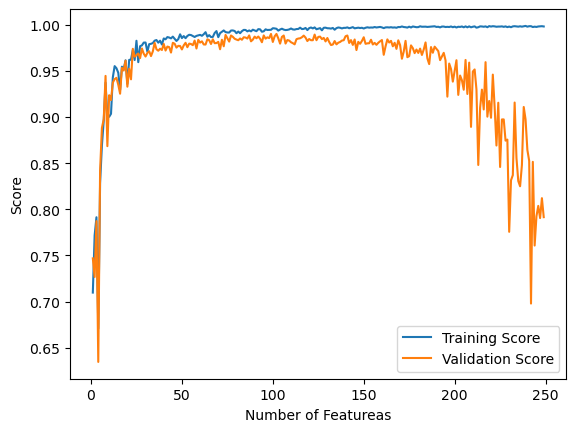

In [465]:
n_train = 250
n_val = 250
p_features = range(1, n_train)
noise = 0.2

train_score = []
val_score = []
L1 = Lasso(alpha = 0.001)

# create some data
for i in p_features:
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, i, noise)
    L1.fit(X_train, y_train)
    train_score.append(L1.score(X_train, y_train).round(4))
    val_score.append(L1.score(X_val, y_val).round(4))

plt.plot(p_features, train_score, label = "Training Score")
plt.plot(p_features, val_score, label = "Validation Score")
plt.xlabel('Number of Featureas')
plt.ylabel('Score')
plt.legend()
plt.show()

# Conclusion
From this blog post, I learned how to implement linear regression in two different ways to arrive at the same result. I also learned how increases the number of features can benefit the validation score up to a certain point. When the number of features became too close or equal to the number of data points, the validation score took a deep dive even when the training score remained perfect. This is caused by overfitting. Our model was overfit, or trained too perfectly on the data set which caused it to do not as well on the testing data. Finally, I learned how to use LASSO Regularization. LASSO regularization shrinks the weight vector, w, and is supposed to help accuracy when there are more features. Overall, I learned a lot through implementing linear regression through both the formula we derived in class along with gradient decent. I will keep in mind aspects such as the effect increasing the number of features has on the validation score as I move forward with other implementations and projects.